In [1]:
import seaborn as sns
import pandas as pd

In [2]:
tips=sns.load_dataset("tips")

In [4]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
tips.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [6]:
tips.day.unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

In [7]:
tips.time.unique()

['Dinner', 'Lunch']
Categories (2, object): ['Lunch', 'Dinner']

# How many dinner and lunch data are present in the dataset ?

In [10]:
tips.time.value_counts()

Dinner    176
Lunch      68
Name: time, dtype: int64

<AxesSubplot:>

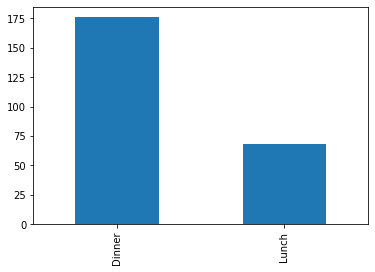

In [13]:
tips.time.value_counts().plot(kind='bar')

# What is the proportion of dinner and lunch in % ?

In [15]:
tips.time.value_counts(normalize = True)*100

Dinner    72.131148
Lunch     27.868852
Name: time, dtype: float64

# Finding when people give more tips ie during dinner or lunch ?

In [16]:
tips.groupby(['time'])['tip'].mean()

time
Lunch     2.728088
Dinner    3.102670
Name: tip, dtype: float64

<AxesSubplot:xlabel='time'>

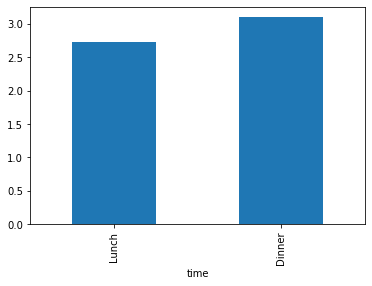

In [17]:
tips.groupby(['time'])['tip'].mean().plot.bar()

# Similarly finding average tip based on 
  
#  1. smoker
#  2. sex
#  3. day
#  4. size

In [19]:
tips.groupby(['smoker','sex'])['tip'].mean()

smoker  sex   
Yes     Male      3.051167
        Female    2.931515
No      Male      3.113402
        Female    2.773519
Name: tip, dtype: float64

# Putting these values as a pivot table

In [20]:
tips.groupby(['smoker','sex'])['tip'].mean().unstack()

sex,Male,Female
smoker,,
Yes,3.051167,2.931515
No,3.113402,2.773519


# Creating a new column to calculate the % of tip compared to the total bill

In [24]:
tips['tip_percent'] = (tips.tip/tips.total_bill)*100

In [25]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_percent
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765


# visualizing the relationship between tip and total bill

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

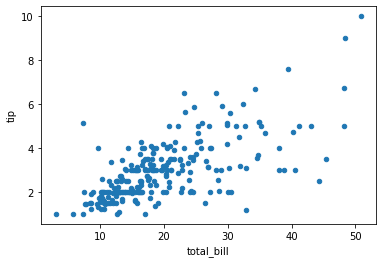

In [26]:
tips.plot.scatter(x = 'total_bill', y = 'tip')

# visualizing the same using sns library 

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

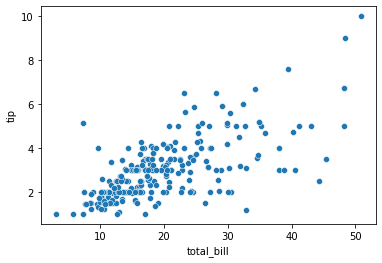

In [27]:
sns.scatterplot(x='total_bill',y='tip',data=tips)

# understanding the effect of sex in the above visualization

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

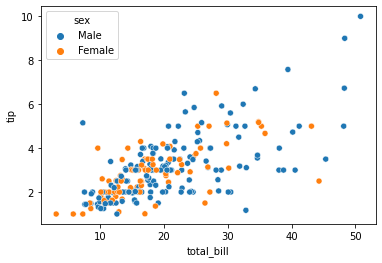

In [28]:
sns.scatterplot(x='total_bill',y='tip',data=tips ,hue='sex')

# understanding the effect of time in the above visualization

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

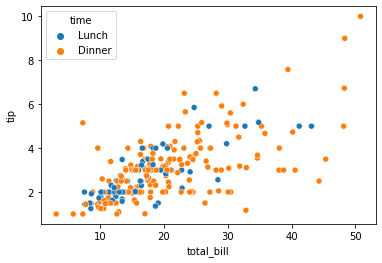

In [29]:
sns.scatterplot(x='total_bill',y='tip',data=tips ,hue='time')

# Splitting the above time chart based on sex for better understanding

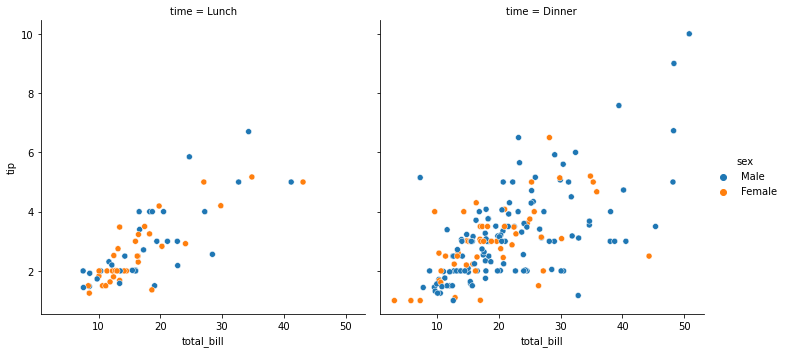

In [31]:
sns.relplot(
             x='total_bill' , y ='tip' , data=tips, col='time', hue='sex'
           )

# Analysing the distribution of total bill based on time

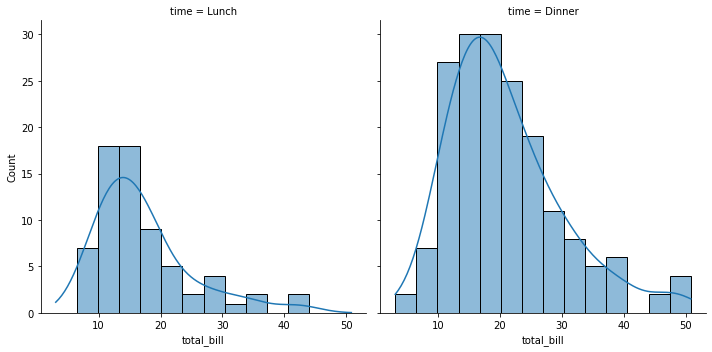

In [32]:
sns.displot(data=tips, x='total_bill', col ='time', kde =True)

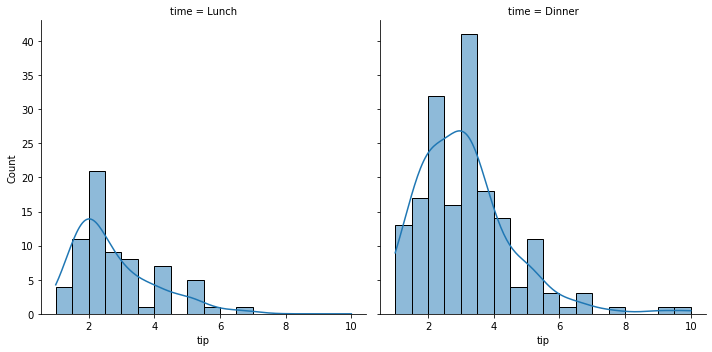

In [33]:
sns.displot(data=tips, x='tip', col ='time', kde =True)

# Creating a correlation and distribution for all numeric values by sex

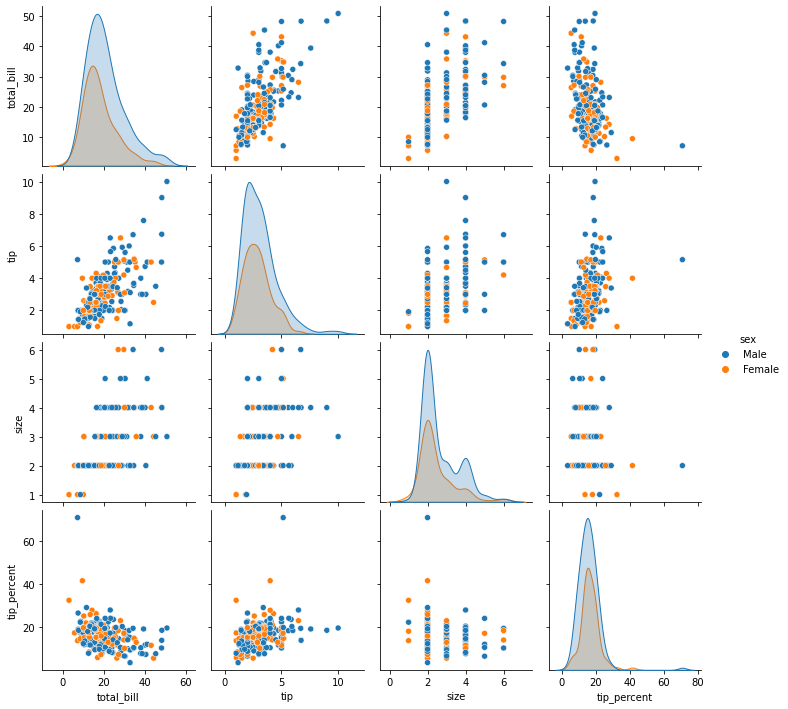

In [34]:
sns.pairplot(data=tips,hue='sex')